In [50]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [51]:
df = pd.read_csv('50_Startups.csv')

In [52]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [53]:
# prompt: count total rows and columns


print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 50
Number of columns: 5


In [54]:
# prompt: find datatypes and null values

# Print data types of each column
print(df.dtypes)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [55]:
# prompt: Check for any zero values

# Check for any zero values in the DataFrame
print(df.isin([0]).sum())


R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64


In [56]:
# prompt: Remove those zero values data

# Remove rows with zero values in specific columns
columns_to_check = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']  # Replace with your actual column names
df = df[~(df[columns_to_check] == 0).any(axis=1)]

# Verify that zero values have been removed
print(df.isin([0]).sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [57]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 46
Number of columns: 5


In [58]:

if 'State' in df.columns:
    df['State'] = df['State'].replace({'California': 0, 'Florida': 1, 'New York': 2})
    print(df.head())
else:
    print("State column not found in the DataFrame.")

   R&D Spend  Administration  Marketing Spend  State     Profit
0  165349.20       136897.80        471784.10      2  192261.83
1  162597.70       151377.59        443898.53      0  191792.06
2  153441.51       101145.55        407934.54      1  191050.39
3  144372.41       118671.85        383199.62      2  182901.99
4  142107.34        91391.77        366168.42      1  166187.94


<ipython-input-58-2ca16d4a31c6>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['State'] = df['State'].replace({'California': 0, 'Florida': 1, 'New York': 2})


In [59]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [60]:
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.196068,0.708253,0.068001,0.977703
Administration,0.196068,1.000000,-0.085831,0.061616,0.135076
Marketing Spend,0.708253,-0.085831,1.000000,0.105814,0.732277
State,0.068001,0.061616,0.105814,1.000000,0.050151
Profit,0.977703,0.135076,0.732277,0.050151,1.000000


### ✅ **So, by calculating correlation we can say that R&D Spend has high correlation with the dependent variable i.e Profit**
### **We can have R&D Spend as Independent variable and Profit as Dependent variable**

In [61]:
X = df[['R&D Spend']]  # Input (independent variable)
y = df['Profit']     # Dependent variable

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [65]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [66]:
r2_score( y_test, y_pred)

0.9498810358712269

### ✅**94% of the variation in the Profit can be explained by R&D Spend**

In [67]:
print(lr.intercept_)

52680.36414140515


In [68]:
#checking the prediction
lr.predict(X[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([186945.70314089])

In [69]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [70]:
import pickle

In [71]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [72]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [73]:
X[0:5]

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [74]:
clf2.predict(X[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([186945.70314089, 184711.45537762, 177276.53005417, 169912.32275277,
       168073.06141127])

In [75]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

       Actual      Predicted
40   78239.91   76029.191140
26  105733.54  113848.221422
27  105008.31  111232.515337
45   64926.08   53492.561721
36   90708.19   75955.647320


### ✅**The predicted values is reasonably close to the Actual values**

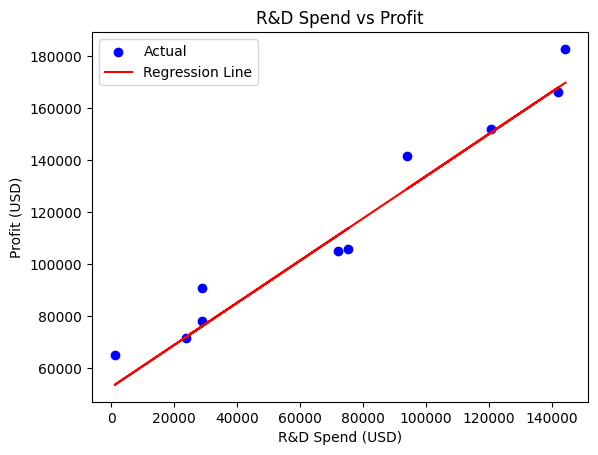

In [76]:
import matplotlib.pyplot as plt

# Scatter plot of actual data
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend (USD)')
plt.ylabel('Profit (USD)')
plt.legend()
plt.show()